In [1]:
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
names_path = 'D:\Project\GitHub\Learning\PY-4.1\\names\\'
cols = ['Name','Gender','Count']

In [3]:
names_by_year = {}
for year in range(1900, 2001, 1):
    names_by_year[year] = pd.read_csv(
        names_path + 'yob{}.txt'.format(year),
        names=cols
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
names_all.head(10)

Name Gender  Count
Year Pos                         
1900 0         Mary      F  16707
     1        Helen      F   6343
     2         Anna      F   6114
     3     Margaret      F   5304
     4         Ruth      F   4765
     5    Elizabeth      F   4096
     6     Florence      F   3920
     7        Ethel      F   3896
     8        Marie      F   3856
     9      Lillian      F   3414

In [4]:
names_RR = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum().query('Name == ["Ruth", "Robert"]')
names_RR.head(5)

Count
Year Name         
1900 Robert   3845
     Ruth     4781
1901 Robert   2559
     Ruth     3989
1902 Robert   3201

## график изменения количества имен Ruth и Robert с 1900 по 2000 и гистограмма по количеству их имен с 1900 по 2000 с 5-летними промежутками

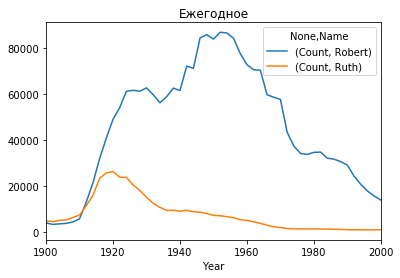

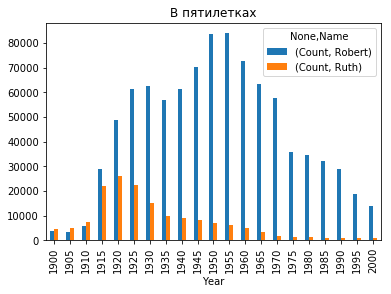

In [11]:
list_y5 = list(range(1900, 2005, 5))
lilst_y2 = list(range(1900, 2002, 2))
names_5year = names_RR.query('Year == @list_y5')
names_10year = names_RR.query('Year == @lilst_y2')
names_10year.unstack('Name').plot(title='Ежегодное')
names_5year.unstack('Name').plot.bar(title='В пятилетках')

## Круговая диаграма по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год (можно выбрать букву и год)

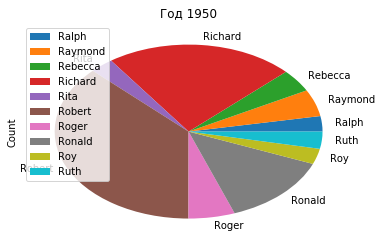

In [6]:
def pie_chart_for_name(name_l, year):
    name_year = pd.read_csv(names_path + 'yob{}.txt'.format(str(year)), names=cols)
    name_year['First_letter'] = name_year.apply(lambda row: row.Name[:1], axis=1)
    name_year = name_year.query('First_letter == @name_l').sort_values(by = 'Count', ascending=False).head(10)
    name_year = name_year.groupby('Name').sum().plot.pie(y='Count',title='Год ' + str(year))
    return name_year

pie_chart_for_name('R','1950')

### Подсказали способ проще, через str.startswith:

In [7]:
names_all['new_line'] = names_all['Name'].str.startswith('R')
names_R_1950 = names_all.query('Year == 1950').query('new_line == True').sort_values(by = 'Count', ascending=False).head(10)

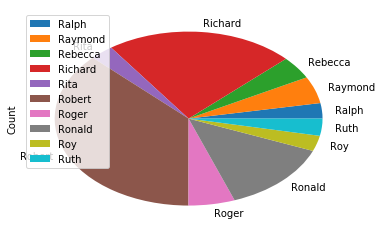

In [8]:
names_R_1950.groupby('Name').sum().plot.pie(y='Count')

## Подготовка таблицы, высчитываем количество согласных в имени

In [9]:
regex = '([eyuioa])'
    
names_grp = names_all.drop('new_line', axis=1).groupby('Name').sum().sort_values(by='Count', ascending=False)
names_grp.reset_index(level=0, inplace=True)
# names_grp['Consonant_count'] = names_grp.apply(lambda row: row.Name.replace(regex, '', case=False), axis=1)
names_grp['Consonants'] = names_grp.Name.str.replace(regex, '', case=False)
names_grp['Consonant_count'] = names_grp.apply(lambda row: len(row.Consonants), axis=1)
names_grp = names_grp.drop('Consonants', axis=1)
names_grp.head(10)

,Name,Count,Consonant_count
0,James,4810186,3
1,John,4739822,3
2,Robert,4638865,4
3,Michael,4023388,4
4,Mary,3853598,2
5,William,3655274,4
6,David,3351248,3
7,Richard,2493042,5
8,Joseph,2289687,4
9,Charles,2189622,5


## Строим  точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет.

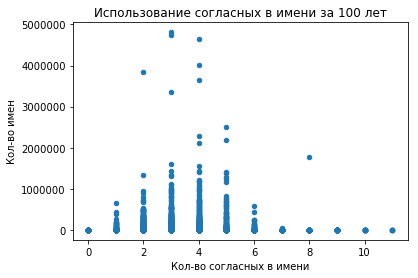

In [10]:
names_grp.plot.scatter(x='Consonant_count', y='Count', title='Использование согласных в имени за 100 лет')
plt.xlabel('Кол-во согласных в имени')
plt.ylabel('Кол-во употреблений')